# Predicting Happiness based on income


### Import the basic required libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as ms
%matplotlib inline

### Importing the dataset

In [2]:
data = pd.read_csv('income.data.csv')

### Analyze Data

In [3]:
data.head()

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398


In [4]:
data.tail()

,Unnamed: 0,income,happiness
493,494,5.249209,4.568705
494,495,3.471799,2.535002
495,496,6.087610,4.397451
496,497,3.440847,2.070664
497,498,4.530545,3.710193


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  498 non-null    int64  
 1   income      498 non-null    float64
 2   happiness   498 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [6]:
data.shape

(498, 3)

In [7]:
data.describe()

,Unnamed: 0,income,happiness
count,498.000000,498.000000,498.000000
mean,249.500000,4.466902,3.392859
std,143.904482,1.737527,1.432813
min,1.000000,1.506275,0.266044
25%,125.250000,3.006256,2.265864
50%,249.500000,4.423710,3.472536
75%,373.750000,5.991913,4.502621
max,498.000000,7.481521,6.863388


In [8]:
data.corr()

,Unnamed: 0,income,happiness
Unnamed: 0,1.000000,0.024831,0.029269
income,0.024831,1.000000,0.865634
happiness,0.029269,0.865634,1.000000


## Visualization of the Data


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  498 non-null    int64  
 1   income      498 non-null    float64
 2   happiness   498 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


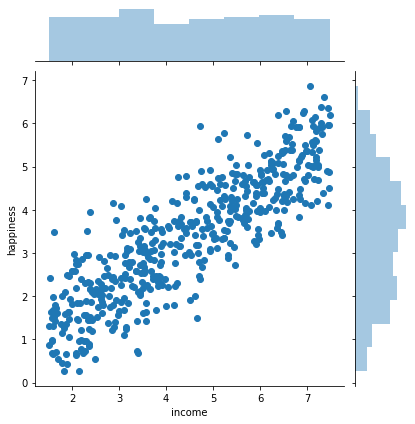

In [10]:
sns.jointplot(x='income',y='happiness',data=data)

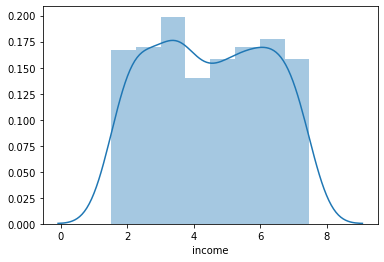

In [11]:
sns.distplot(data['income'])

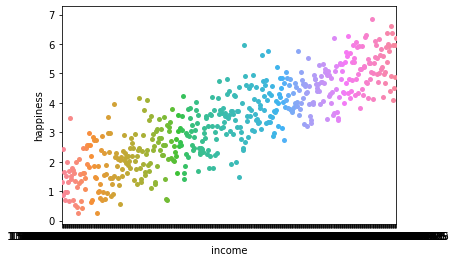

In [12]:
sns.swarmplot(y='happiness',x='income',data=data)

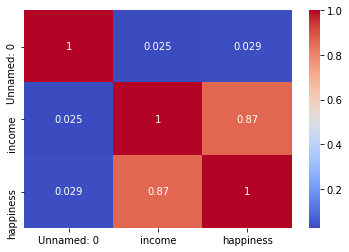

In [13]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

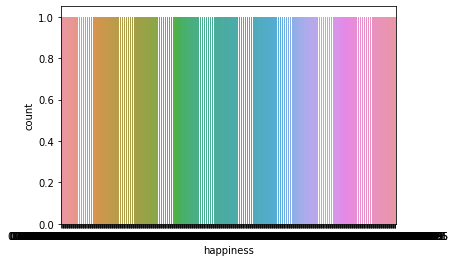

In [14]:
sns.countplot(data['happiness'])

## Cleaning Data

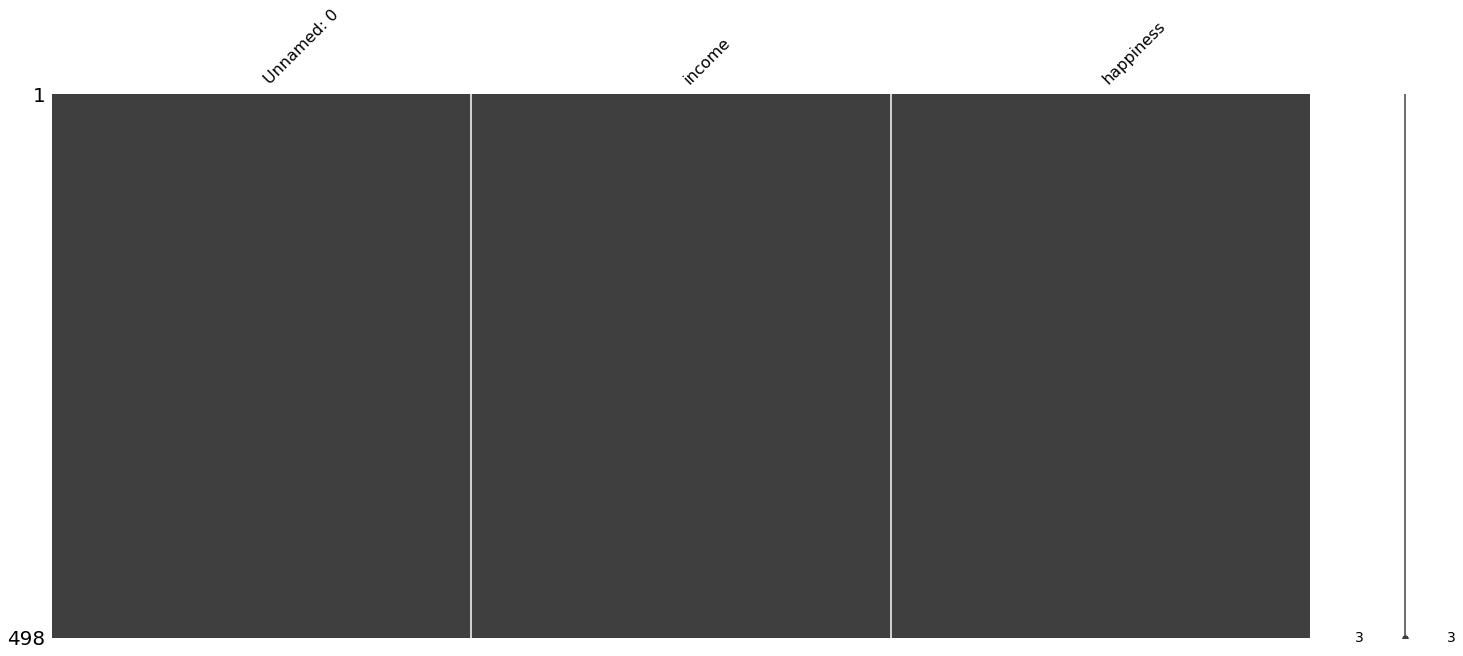

In [15]:
ms.matrix(data)

The dataset does not have the null values

### Removing unwanted columns

In [16]:
dataset = data.copy()

In [17]:
data = data.drop('Unnamed: 0',axis=1)

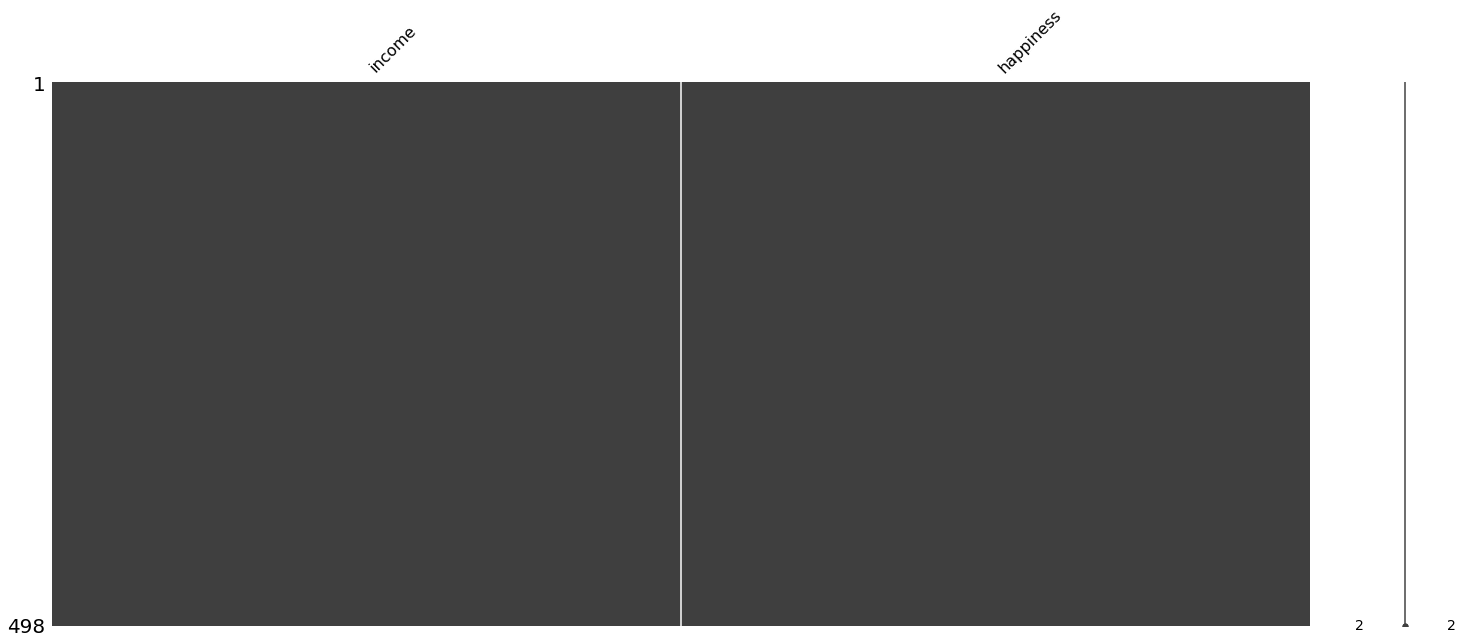

In [18]:
ms.matrix(data)

## Categorical value conversion

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     498 non-null    float64
 1   happiness  498 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Here we don't need to convert the data.

## Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(data.drop('happiness',axis=1),data['happiness'],test_size=1/3,random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regressor = LinearRegression()

In [24]:
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the model on the test

In [30]:
Y_pred_train = regressor.predict(X_train)
Y_pred_test = regressor.predict(X_test)

In [31]:
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
data.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


### Visualizing the Results

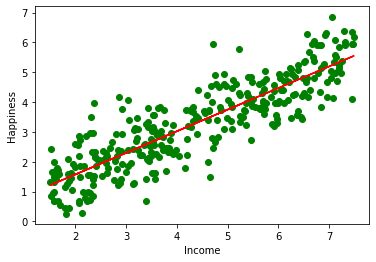

In [33]:
plt.scatter(X_train,Y_train,color="green")
plt.plot(X_train,Y_pred_train,color="Red")
plt.xlabel("Income")
plt.ylabel("Happiness")
plt.show()

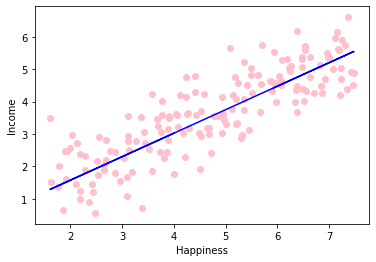

In [34]:
plt.scatter(X_test,Y_test,color="Pink")
plt.plot(X_test,Y_pred_test,color="Blue")
plt.ylabel("Income")
plt.xlabel("Happiness")
plt.show()

### Predicting a new result

In [35]:
print(regressor.predict([[2]]))

[1.57459542]


### Intercept and Coefficients

In [36]:
regressor.intercept_

0.12562810435684613

In [37]:
regressor.coef_

array([0.72448366])

### R-square score

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(Y_test,Y_pred_test)

0.7088330938836779